<a href="https://colab.research.google.com/github/ArseneGiriteka/PyTorch_Deep_Learning/blob/main/Pythorch_workflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
What_will_be_covered = {1: "data (prepare and load)",
                        2: "build model",
                        3: "fiting the model to data (training)",
                        4: "making predictions and evaluating model (inference)",
                        5: "saving and reloading model",
                        6: "putting it all together"}

In [2]:
import torch
from torch import nn #nn contains all of pytorch's building blocks for neural networks
import matplotlib.pyplot as plt

torch.__version__

'2.6.0+cu124'

## 1. Data (prepare and loading)
Types of data in machine learning:
* Excel speadsheet
* Image of any kind
* Videos
* Audio
* DNA
* Text

Machine learning is a game of two parts:
1. Get data into numerical representation
2. Build a model to learn patterns in that numerical representation

To showcase this, let's create some kwown data using the linear regression formula.

we'll use a linear regression formula to make a straight line with kwown parameters

In [3]:
# Create *kwown* parameters
weight = 0.7
bias = 0.3

start = 0
end = 1
step = 0.02

X = torch.arange(start, end, step).unsqueeze(dim=1)
Y = weight * X + bias
X[:10], Y[:10], len(X), len(Y)

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]),
 50,
 50)

### Split data into training and test sets (one of the most important concept in machine learning in general)

Let's Create a training and test set with our data

In [4]:
# Create a train/test split

train_split = int(0.8 * len(X))
X_train, Y_train = X[:train_split], Y[:train_split]
X_test, Y_test = X[train_split:], Y[train_split:]

len(X_train), len(Y_train), len(X_test), len(Y_test)

(40, 40, 10, 10)

#Let's vizualize data

In [5]:
def plot_predictions(train_data=X_train, train_label=Y_train,
                     test_data=X_test, test_label=Y_test,
                     predictions=None):
  """Plots training data, test data and compare predictions."""
  plt.figure(figsize=(10, 7))

  #plot training data in blue
  plt.scatter(train_data, train_label, c="b", s=4, label="Training data")

  #plot test data in green
  plt.scatter(test_data, test_label, c="g", s=4, label="Test data")

  # Are there predictions?
  if predictions is not None:
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  # Show the legend
  plt.legend(prop={"size": 14})

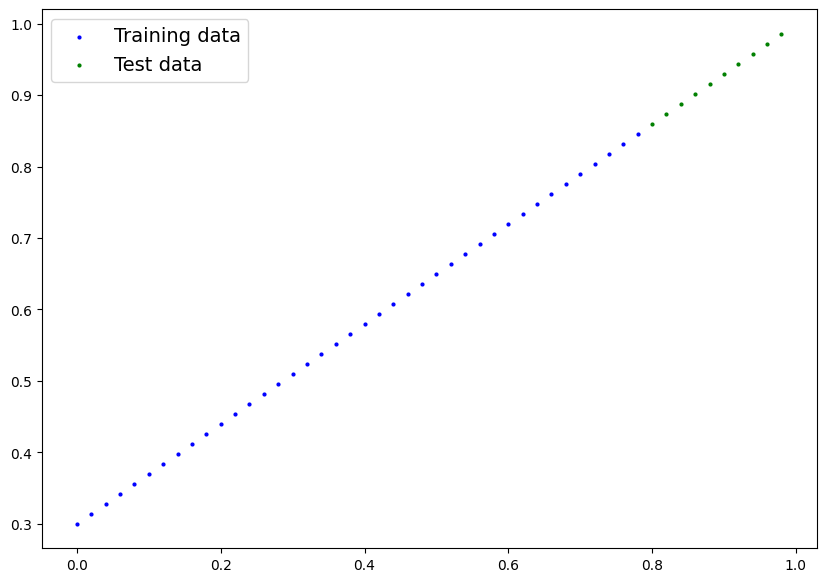

In [6]:
plot_predictions();

## 2. Building a model

first model

What out model does:
* start with random values (weight & bias)
* Look at training data and adjust the random values to better represent (or get closer to) the ideal values (the weight & bias values we used to create the data)

How does it do  so?

Through two main algorithms:
1. Cradient descent
2. Backpropagation

In [7]:
from torch import nn

# Create linear regression model class
class LinearRegressionModel(nn.Module): # <- Almost everything in Pytorch inherits from nn.Module
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))
    self.bias = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))

  # Forward method to define the computation in the model
  def forward(self, x: torch.Tensor) -> torch.Tensor: # <- "x" is the input data
    return self.weights * x + self.bias # linear regression formula